In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

## Pre-Task: Describe the goals of your study

## Part 1: Aquire the Data

In [2]:
# psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
# password: gastudents

In [1]:
import connection

#### 1. Connect to the remote database

In [3]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine(connection.params)


pd.read_sql('SELECT * FROM train', con=engine)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C


In [4]:
titanic = pd.read_csv("../../assets/data/train.csv")

#### 2. Query the database and aggregate the data

In [5]:
sql = """
SELECT COUNT("PassengerId"), "Survived"
FROM train
GROUP BY "Survived"
"""

pd.read_sql(sql,con=engine)

,count,Survived
0,549,0
1,342,1


In [6]:
sql = """
SELECT COUNT("PassengerId"), "Sex"
FROM train
GROUP BY "Sex"
"""

pd.read_sql(sql,con=engine)

,count,Sex
0,577,male
1,314,female


In [7]:
sql = """
SELECT COUNT("Pclass"), "Pclass"
FROM train
GROUP BY "Pclass"
"""

pd.read_sql(sql,con=engine)

,count,Pclass
0,216,1
1,184,2
2,491,3


#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

#### 2. Visualize the Data

In [8]:
import seaborn as sns
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


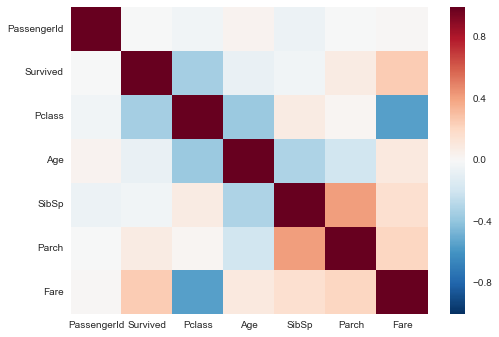

In [9]:
sns.heatmap(corr)

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [12]:
del titanic['Cabin']

In [13]:
titanic = titanic.dropna()

titanic['Sex'] = titanic['Sex'].apply(lambda x: 0 if x =='female' else 1)
titanic.shape

(712, 11)

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [14]:
predictors = titanic[['Sex','Age','Pclass','Fare']]

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

logistic = LogisticRegression()

target = titanic['Survived'].values

X = predictors
Y = target

logistic.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [15]:
Y = np.ravel(Y)

#### 3. Conduct the logistic regression

In [16]:
logistic.score(X,Y)

0.7935393258426966

#### 4. Examine the coefficients to see our correlations

In [17]:
log_coef = logistic.coef_
log_coef

array([[-2.26282916, -0.02573459, -0.94703654,  0.00298867]])

#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)
logistic.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 7. Predict the class labels for the *Test* set

In [19]:
Y_pred = logistic.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1])

#### 8. Predict the class probabilities for the *Test* set

In [20]:
log_prob = logistic.predict_proba(X_test)
log_prob[0:10]

array([[ 0.71057926,  0.28942074],
       [ 0.85571391,  0.14428609],
       [ 0.07377737,  0.92622263],
       [ 0.35818608,  0.64181392],
       [ 0.52392146,  0.47607854],
       [ 0.65051342,  0.34948658],
       [ 0.29189545,  0.70810455],
       [ 0.66134551,  0.33865449],
       [ 0.85798875,  0.14201125],
       [ 0.65562051,  0.34437949]])

#### 9. Evaluate the *Test* set

In [21]:
logistic.score(X_test,Y_test)

0.79574468085106387

#### 10. Cross validate the test set

In [22]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(logistic,X_test,Y_test,cv=5)
print score
print np.mean(score)

[ 0.74468085  0.78723404  0.78723404  0.74468085  0.74468085]
0.76170212766


#### 11. Check the Classification Report

In [23]:
from sklearn.metrics import classification_report
print classification_report(Y_test, Y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.81      0.86      0.83       140
   Survived       0.78      0.69      0.73        95

avg / total       0.79      0.80      0.79       235



#### 12. What do the classification metrics tell us?

#### 13. Check the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_test, Y_pred))

,0,1
0,121,19
1,29,66


#### 14. What does the Confusion Matrix tell us? 

#### 15. Plot the ROC curve

#### 16. What does the ROC curve tell us?

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [26]:
from sklearn.grid_search import GridSearchCV

logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']
}

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

In [29]:
estimator = GridSearchCV(logistic, logreg_parameters, cv =5)
estimator.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
print "Best Parama:", estimator.best_params_
print "Best Score:", estimator.best_score_

 Best Parama: {'penalty': 'l1', 'C': 0.59636233165946362, 'solver': 'liblinear'}
Best Score: 0.789325842697


#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [36]:
knn_params = {
    'n_neighbors':  [3,50], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}

In [38]:
estimator2 = GridSearchCV(knn,knn_params,cv=5)
estimator2.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 50], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [39]:
print "Best Param:", estimator2.best_params_
print "Best Score:", estimator2.best_score_

Best Param: {'n_neighbors': 50, 'weights': 'uniform', 'algorithm': 'kd_tree', 'p': 1}
Best Score: 0.707865168539


#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [50]:
optimal_knn_params = {
    'n_neighbors': [50],
    'weights': ('uniform'),
    'algorithm': ('kd_tree'),
    'p': [1]
}

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

## Part 8: [VERY BONUS] Decision trees, ensembles, bagging

#### 1. Gridsearch a decision tree classifier model on the data, searching for optimal depth. Create a new decision tree model with the optimal parameters.

#### 2. Compare the performace of the decision tree model to the logistic regression and kNN models.

#### 3. Plot all three optimized models' ROC curves on the same plot. 

#### 4. Use sklearn's BaggingClassifier with the base estimator your optimized decision tree model. How does the performance compare to the single decision tree classifier?

#### 5. Gridsearch the optimal n_estimators, max_samples, and max_features for the bagging classifier.

#### 6. Create a bagging classifier model with the optimal parameters and compare it's performance to the other two models.